In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from random import randint

## Introduction to Linear Regression
Assume that we have a simple dataset with $N$ pairs of $x$ and $y$ values, e.g.

$$(x_0, y_0), (x_1, y_1), \cdots ,(x_N, y_N) $$

We want to fomulate a linear model to discribe the relateionshop between $x$ and $y$. The linear model can be express as:

$$y = \beta_0 + \beta_1 x$$

For a linear function, $\beta_0$ is the intercept, and $\beta_1$ is the slope. These are two parameters that we want to estimate.

In [3]:
# let's load a sample dataset
# gvh = pd.read_csv("grade_vs_no_of_hours.csv")
gvh = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/grade_vs_no_of_hours.csv")
gvh.head()

,grade,no_of_hours
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


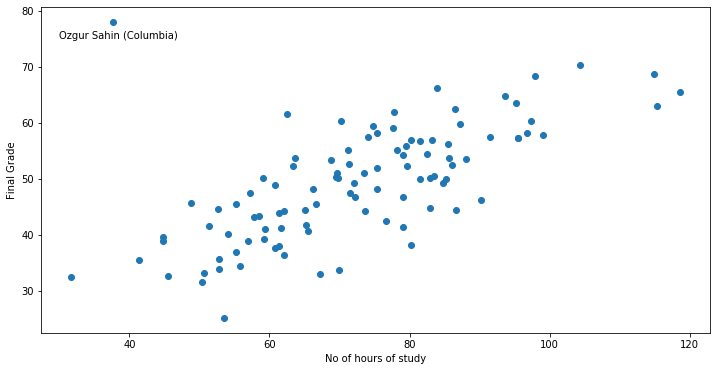

In [4]:
# Let's see what we have
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.text(30,75,'Ozgur Sahin (Columbia)')
plt.show()

Numpy has a <code>polyfit</code> function which can determine $\beta_0$ and $\beta_1$ for us. Later we'll learn how we calculate them.

In [5]:
Lin_Reg_Coefficients = np.polyfit(gvh.no_of_hours, gvh.grade, 1)
Lin_Reg_Coefficients

array([ 0.3980811 , 20.43090502])

In [6]:
x = np.arange(30,160)
y_prediction = Lin_Reg_Coefficients[0]*x+Lin_Reg_Coefficients[1]

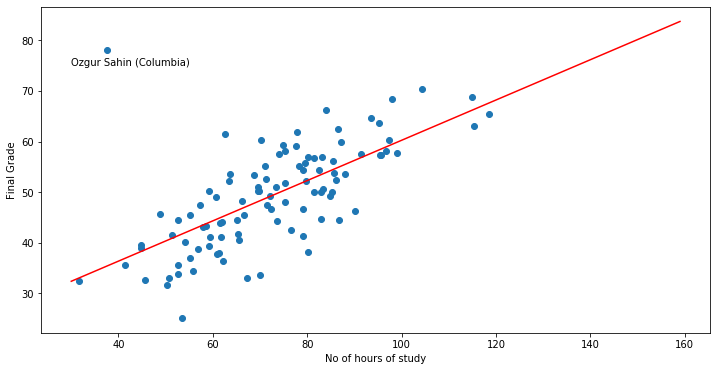

In [7]:
fig = plt.figure(figsize=(12,6))
plt.scatter(gvh.no_of_hours, gvh.grade)
plt.plot(x,y_prediction,'r')
plt.xlabel('No of hours of study')
plt.ylabel('Final Grade')
plt.text(30,75,'Ozgur Sahin (Columbia)')
plt.show()

#### Questions
- Can we guess the grade of a student who works for 160 hours in total?
- Do you see a problem (hint what if the student works for 1600 hours??)

In [8]:
x_guess = 160
y_guess = Lin_Reg_Coefficients[0]*x_guess+Lin_Reg_Coefficients[1]
print(y_guess)

84.12388093958387


In [16]:
x_guess = 1600
y_guess = Lin_Reg_Coefficients[0]*x_guess+Lin_Reg_Coefficients[1]
print(y_guess)

657.3606641915337


#### Comment:
Linear regression is very useful and powerful but there are certain limits where it could be applied. <br>

We heavily use statistics to determine these limits. <br>

### Descriptive vs. Inferential Statistics
 - <b>Descriptive:</b> describes data you have but can't be generalized beyond that (e.g. median)
 - <b>Inferential: </b> enables inferences about the population beyond our data (e.g. t-test)


We'll talk about these in detail later. At this moment, let's look at the following example after learning about Dr. John Tukey.

## John Tukey
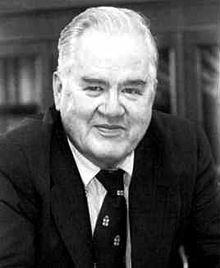

 - Co-inventor FFT
 - Created techniques for visualizing and summarizing data
  - 5-number summary, box plots, stem and leaf diagrams,…
 - Author of the famous EDA book (1977)
 - What can the data tell us? (in contrast to “confirmatory” data analysis) <br>
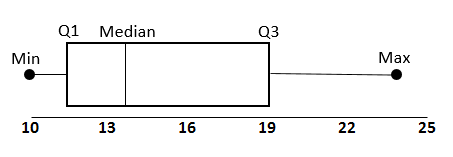



### Anscombe's Quarted
This famous dataset was created by statistician Francis Anscombe in 1973. There are four groups each consisting of 11 pairs of x and y coordinates.

In [9]:
# anscombe = pd.read_csv("anscombes.csv")
anscombe = pd.read_csv("https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/anscombes.csv")
anscombe

,xA,yA,xB,yB,xC,yC,xD,yD
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


(3, 13)

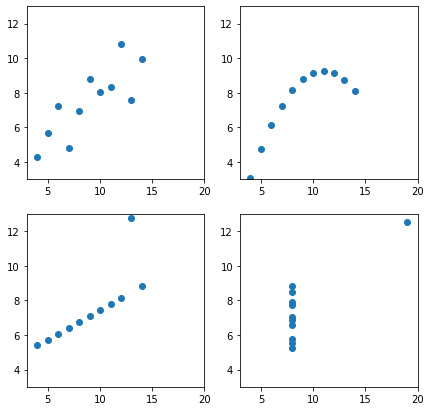

In [10]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221)
ax1.scatter(anscombe.xA, anscombe.yA)
ax1.set_xlim(3,20)
ax1.set_ylim(3,13)

ax2 = fig.add_subplot(222)
ax2.scatter(anscombe.xB, anscombe.yB)
ax2.set_xlim(3,20)
ax2.set_ylim(3,13)

ax3 = fig.add_subplot(223)
ax3.scatter(anscombe.xC, anscombe.yC)
ax3.set_xlim(3,20)
ax3.set_ylim(3,13)

ax4 = fig.add_subplot(224)
ax4.scatter(anscombe.xD, anscombe.yD)
ax4.set_xlim(3,20)
ax4.set_ylim(3,13)

It looks like these four groups have almost nothing in common! <br>
Let's try to fit them with Linear Regression

In [18]:
zA = np.polyfit(x=anscombe.xA, y=anscombe.yA, deg=1)
zB = np.polyfit(x=anscombe.xB, y=anscombe.yB, deg=3)
zC = np.polyfit(x=anscombe.xC, y=anscombe.yC, deg=1)
zD = np.polyfit(x=anscombe.xD, y=anscombe.yD, deg=1)


In [19]:
x = np.arange(0,21)
fxA = zA[0]*x+zA[1]
fxB = zB[0]*x*x*x+zB[1]*x*x+zB[2]*x+zB[3]
fxC = zC[0]*x+zC[1]
fxD = zD[0]*x+zD[1]

(3, 13)

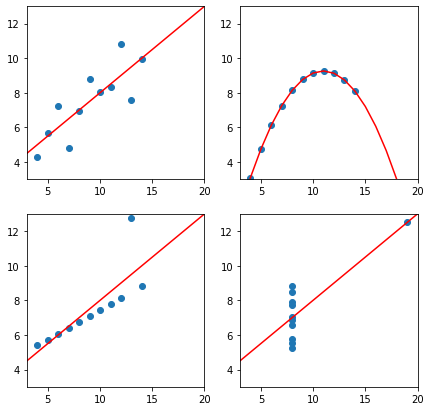

In [20]:
fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(221)
ax1.scatter(anscombe.xA, anscombe.yA)
ax1.plot(x, fxA,'r')
ax1.set_xlim(3,20)
ax1.set_ylim(3,13)

ax2 = fig.add_subplot(222)
ax2.scatter(anscombe.xB, anscombe.yB)
ax2.plot(x, fxB,'r')
ax2.set_xlim(3,20)
ax2.set_ylim(3,13)

ax3 = fig.add_subplot(223)
ax3.scatter(anscombe.xC, anscombe.yC)
ax3.plot(x, fxC,'r')
ax3.set_xlim(3,20)
ax3.set_ylim(3,13)

ax4 = fig.add_subplot(224)
ax4.scatter(anscombe.xD, anscombe.yD)
ax4.plot(x, fxD,'r')
ax4.set_xlim(3,20)
ax4.set_ylim(3,13)

Even though these four groups look quite different, we ended up using the same linear regression model to make predictions. This was a simple case where we could determine the issue visually but when there are tens of variables, things will get complicated. We really need to understand distributions, how to characterize them, and how to transform them (when needed).

## DISTRIBUTIONS and BASIC STATS

In [19]:
# df = pd.read_csv('distributions.csv')
df = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/2021Fall/datasets/distributions.csv')
df.head(5)

,age,weight,income,year_of_experience,married
0,44,76,173350,11,1.0
1,49,77,97150,4,1.0
2,61,69,194300,14,1.0
3,67,65,251200,20,1.0
4,47,66,231750,17,1.0


In [20]:
df.shape

(20000, 5)

In [21]:
df.describe()

,age,weight,income,year_of_experience,married
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,42.486450,69.946300,155205.550000,9.51785,0.470400
std,14.393689,4.992731,45087.367102,4.46607,0.499136
min,18.000000,53.000000,49450.000000,0.00000,0.000000
25%,30.000000,66.000000,122400.000000,6.00000,0.000000
50%,42.000000,70.000000,149000.000000,9.00000,0.000000
75%,55.000000,73.000000,181400.000000,12.00000,1.000000
max,67.000000,91.000000,447950.000000,38.00000,1.000000


Dataframe's boxplot
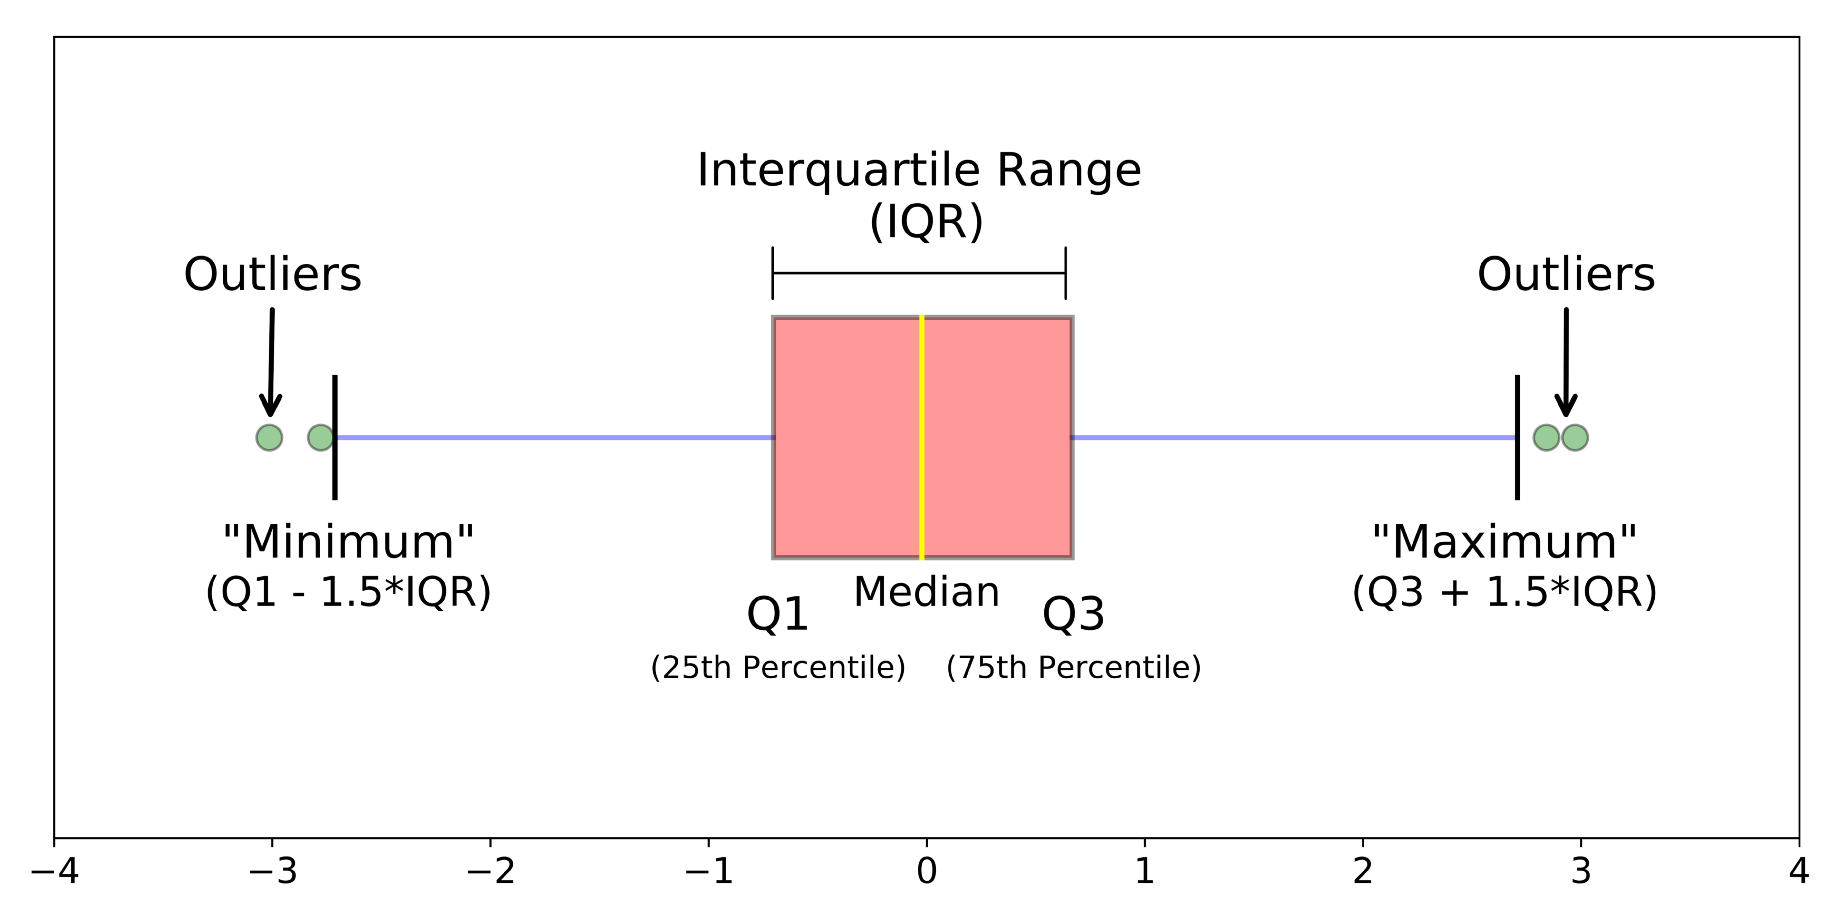

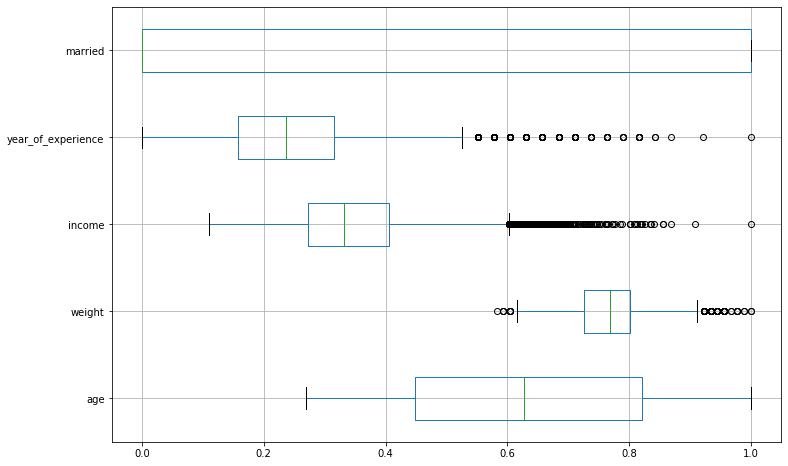

In [23]:
# normalize each column to have an idea of distributions 
dfnormalized = df/df.max()
dfnormalized.boxplot(vert=False, figsize=(12,8))

## Variance, Standard Deviation, Skewness, Covariance, Correlation
Mean: 
$$\mu(X) = \mu_x = \frac{1}{{N}}\sum\limits_{i}^{N}{X_i}  $$

Variance: A measure of dispersion (how far a set of numbers is spread out from their average value)
$$\mathrm{Var}(X) = \frac{1}{{N}} \sum\limits_{i}^{N}{(X_i – \mu_x)^2} $$

Standard Deviation:
$$\sigma = \sqrt{\mathrm{Var}(X)}$$

Coefficient of Variation: A relative dispersion of data points in a data series around the mean.
$$\mathrm{CV} = \frac{\sigma}{\mu_x}$$

Skewness: A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
$$\mu_3 = \frac{\sum\limits_{i}^{N}{(X_i – \mu_x)^3}}{{(N-1)\sigma^3}}  $$

Covariance: A measure of the variance between two variables
$$\mathrm{cov}(X, Y) = \frac{1}{{N}} \sum\limits_{i}^{N}{(X_i – \mu_x)(Y_i – \mu_y)}$$

Correlation: A measure of the strength of a relationship between data
$$\mathrm{r}(X, Y) = \frac{\sum\limits_{i}^{N}{(X_i – \mu_x)(Y_i – \mu_y)}}{{\sqrt{\sum\limits_{i}^{N}{(X_i – \mu_x)^2}\sum\limits_{i}^{N}{(Y_i – \mu_y)^2}}}} $$

### Covariance vs. Correlation
- Both measure the relationship and the dependency between two variables.
- Covariance indicates the direction of the linear relationship between variables.
- Correlation measures both the strength and direction of the linear relationship between two variables.
- Correlation values are standardized.
- Covariance values are not standardized.

In [24]:
df.var()

age                   2.071783e+02
weight                2.492736e+01
income                2.032871e+09
year_of_experience    1.994578e+01
married               2.491363e-01
dtype: float64

In [25]:
df.std()

age                      14.393689
weight                    4.992731
income                45087.367102
year_of_experience        4.466070
married                   0.499136
dtype: float64

In [27]:
df.std()/df.mean()

age                   0.338783
weight                0.071379
income                0.290501
year_of_experience    0.469231
married               1.061087
dtype: float64

In [ ]:
df.skew()

age                   0.009624
weight                0.214453
income                0.827843
year_of_experience    0.850380
married               0.118617
dtype: float64

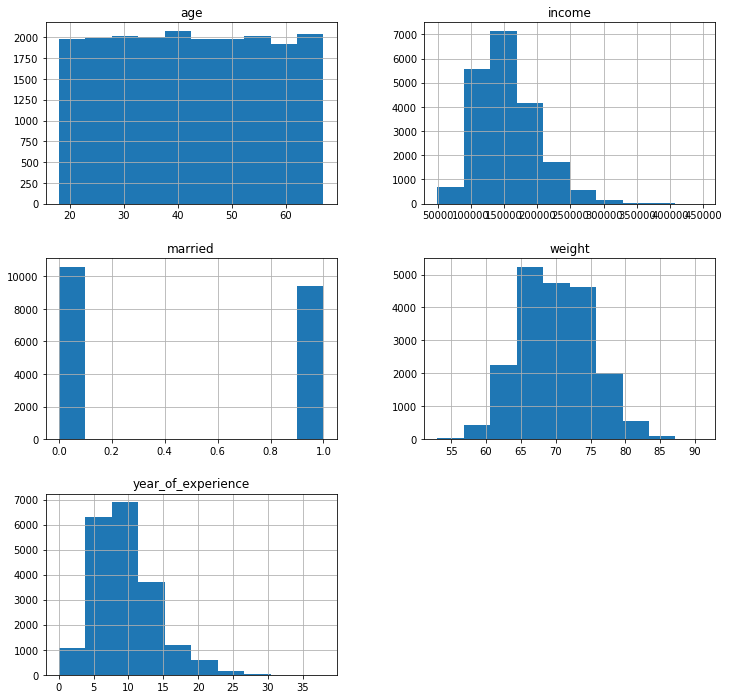

In [28]:
# Let's do lazy histogram first
df.hist(figsize=(12,12))
plt.show()

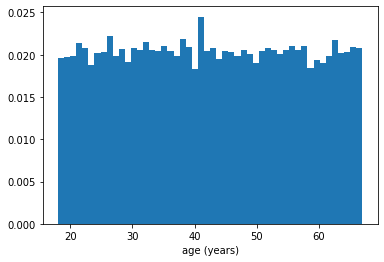

In [32]:
# Now let's look at each column separately 
count, bins, ignored = plt.hist(df.age, 50, density=True)
plt.xlabel('age (years)')
plt.show()

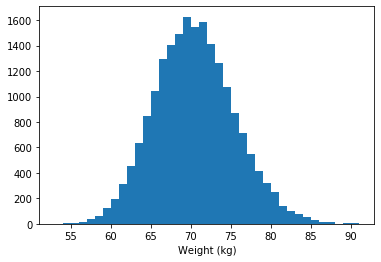

In [40]:
count, bins, ignored = plt.hist(df.weight, 38, density=False)
plt.xlabel('Weight (kg)')
plt.show()

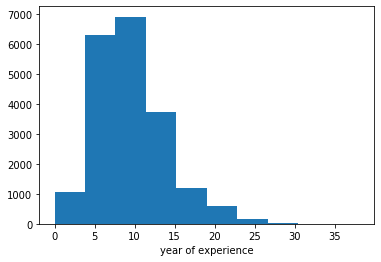

In [39]:
count, bins, ignored = plt.hist(df.year_of_experience, 10, density=False)
plt.xlabel('year of experience')
plt.show()

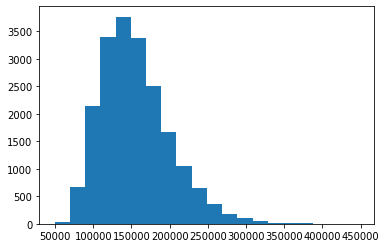

In [38]:
count, bins, ignored = plt.hist(df.income, 20, density=False)
plt.show()

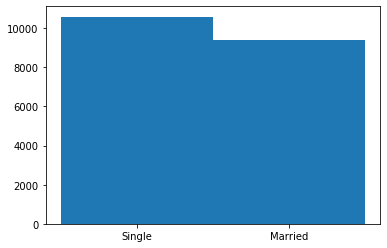

In [41]:
fig, ax = plt.subplots()
count, bins, ignored = ax.hist(df.married, 2, density=False)
ax.set_xticks([0.25,0.75])
ax.set_xticklabels(['Single','Married'])
plt.show()

In [42]:
# Is there correlation between columns?
corr = df.corr()
corr.style.background_gradient(cmap='magma')

,age,weight,income,year_of_experience,married
age,1,-0.0108701,-0.000209395,-8.18004e-05,0.565242
weight,-0.0108701,1,-0.0086647,-0.00799853,-0.00194208
income,-0.000209395,-0.0086647,1,0.990066,0.00207297
year_of_experience,-8.18004e-05,-0.00799853,0.990066,1,0.00208759
married,0.565242,-0.00194208,0.00207297,0.00208759,1
